## Andrew Ingrassia
## World Happiness Report
## Supervised Machine Learning

***
### Contents

1. **Imports** <br><br>

2. **Checking for Outliers** <br><br>

3. **Standardization** <br><br>

4. **Applying PCA (Principal Component Analysis)** <br><br>

5. **Train-Test Split** <br><br>

6. **Predictions & Model Evaluation** <br><br>

7. **Visualizing the Results** <br><br>

8. **Summary of Process and Results** <br><br>

9. **Key Variable Descriptions**

***
### 1) Imports

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [62]:
# Defines a path to WHR related data

path = r'C:\Users\ingra\OneDrive\Desktop\Data Analysis\World Happiness Report\WHR - Data'

In [63]:
# Imports combined WHR data and assigns it to the variable 'df'

df = pd.read_csv(os.path.join(path, 'whr_df_whr2.csv'))

In [64]:
# Enables the display of matplotlib plots directly within the notebook interface

%matplotlib inline

In [65]:
# Defines a list of key variables

key_variables = ['freedom', 'govt_trust', 'economic_status', 'social_support', 'life_expectancy', 'generosity']

*** 
### 2) Checking for Outliers

In [66]:
# Defines a function that identifies potential outliers
def identify_outliers(data, variable, multiplier=1.5):
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr

    potential_outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return potential_outliers

# Loops through each variable and identifies potential outliers
for variable in key_variables:
    outliers = identify_outliers(df, variable)
    print(f"Potential outliers for {variable}:")
    
    for index, value in outliers.iterrows():
        print(f"{index:4} {value[variable]:6.3f}")
    
    print()

Potential outliers for freedom:
  95  0.000
 215  0.058
 654  0.000
 785  0.000
 916  0.000
1047  0.000
1178  0.000

Potential outliers for govt_trust:
   0  0.420
   2  0.484
   3  0.365
   4  0.330
   5  0.414
   6  0.318
   7  0.438
   8  0.429
   9  0.356
  16  0.378
  19  0.386
  20  0.321
  22  0.492
  32  0.325
  62  0.371
 109  0.383
 131  0.445
 132  0.412
 134  0.358
 135  0.410
 136  0.313
 138  0.419
 139  0.323
 140  0.409
 149  0.353
 151  0.470
 157  0.356
 195  0.316
 239  0.319
 262  0.316
 263  0.401
 265  0.367
 266  0.383
 269  0.383
 270  0.384
 279  0.319
 282  0.324
 287  0.464
 393  0.393
 394  0.340
 395  0.408
 397  0.357
 400  0.389
 401  0.383
 409  0.321
 425  0.457
 524  0.393
 525  0.410
 526  0.341
 529  0.343
 530  0.373
 531  0.380
 537  0.316
 556  0.453
 655  0.478
 656  0.495
 657  0.408
 659  0.434
 660  0.369
 661  0.442
 662  0.461
 664  0.367
 665  0.352
 666  0.336
 667  0.323
 670  0.373
 685  0.533
 728  0.332
 786  0.481
 787  0.485
 788  0.

***
### 3) Standardization

In [67]:
# Selects the variables I want to standardize
selected_data = df[key_variables]

# Creates a StandardScaler object
scaler = StandardScaler()

# Fits the scaler to the selected data and transforms it
standardized_data = scaler.fit_transform(selected_data)

# Converts the standardized data back to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=key_variables)

In [68]:
# Views the standardized df

standardized_df.head()

,freedom,govt_trust,economic_status,social_support,life_expectancy,generosity
0,1.369377,2.591840,0.771454,0.876988,1.403226,0.917269
1,1.121938,0.110590,0.553005,1.038996,1.432864,2.151032
2,1.255689,3.161015,0.605892,0.911259,1.123779,1.307812
3,1.396127,2.102704,0.914020,0.817792,1.166120,1.361068
4,1.148688,1.791437,0.608192,0.792868,1.255035,2.346303


In [69]:
# Exports the standardized dataframe for later use

# standardized_df.to_csv(r'C:\Users\ingra\OneDrive\Desktop\standardized_df_whr4.csv', index=False)

#### *Creating a heatmap with standardized variables*

In [79]:
# Extracts the 'happiness_score' column from 'df'
hap_scores = df['happiness_score']

# Concatenates 'happiness_scores' with 'standardized_df'
heatmap_df = pd.concat([standardized_df, hap_scores], axis=1)

# Modifies the variable order
variable_order = ['happiness_score', 'freedom', 'govt_trust', 'economic_status', 'social_support', 'life_expectancy', 'generosity']
heatmap_df = heatmap_df[variable_order]

# Views the dataframe
heatmap_df.head()

,happiness_score,freedom,govt_trust,economic_status,social_support,life_expectancy,generosity
0,7.587,1.369377,2.591840,0.771454,0.876988,1.403226,0.917269
1,7.561,1.121938,0.110590,0.553005,1.038996,1.432864,2.151032
2,7.527,1.255689,3.161015,0.605892,0.911259,1.123779,1.307812
3,7.522,1.396127,2.102704,0.914020,0.817792,1.166120,1.361068
4,7.427,1.148688,1.791437,0.608192,0.792868,1.255035,2.346303


Text(0.5, 1.0, 'WHR Correlation Heatmap')

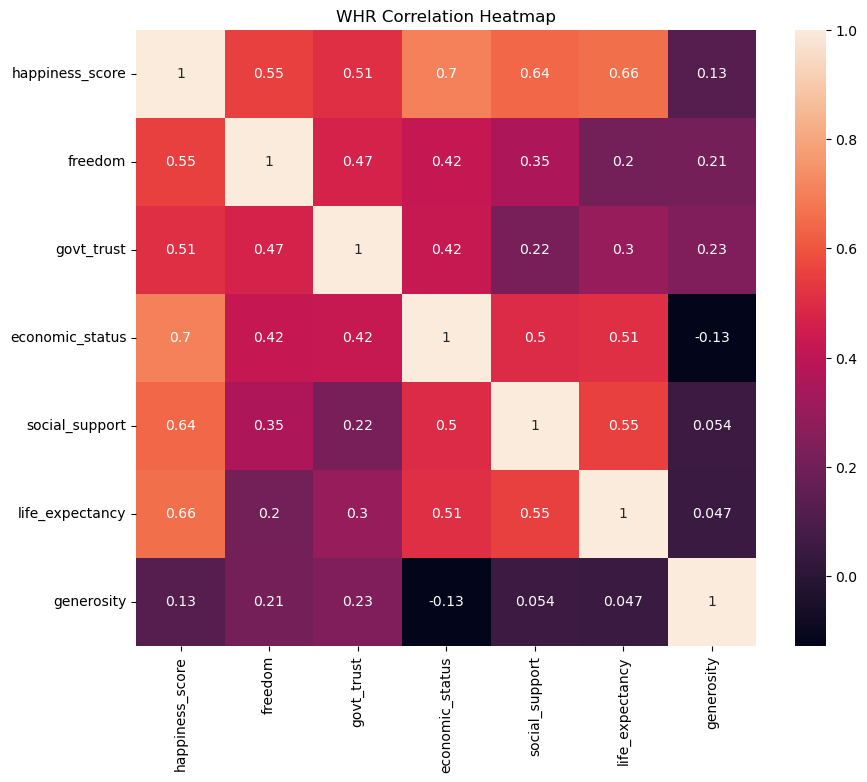

In [82]:
# Creates a correlation matrix using pandas and assigns it to the variable name 'correlation_matrix'
# Limits the matrix to numeric columns only
correlation_matrix = heatmap_df.corr(numeric_only=True)
heatmap_df.corr(numeric_only=True)

# Set the size of the figure (width: 10, height: 10)
plt.figure(figsize=(10, 8))

# Create a correlation heatmap:
# - 'correlation_matrix' is the previously defined matrix containing the correlation values
# - 'annot=True' adds correlation values to the cells
sns.heatmap(correlation_matrix, annot=True)

# Set the title of the plot
plt.title("WHR Correlation Heatmap")

#### *Standardized key variable correlations*

- **Economic Status:** 0.7 <br><br>
- **Life Expectancy:** 0.66 <br><br>
- **Social Support:** 0.64 <br><br>
- **Freedom:** 0.55 <br><br>
- **Government Trust:** 0.51 <br><br>
- **Generosity:** 0.13

In [86]:
# Exports the 'heatmap_df' dataframe

# heatmap_df.to_csv(r'C:\Users\ingra\OneDrive\Desktop\heatmap_df_whr4.csv', index=False)

***
### 4) Applying PCA (Principal Component Analysis)

- Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify and reveal the underlying structure in high-dimensional data. It transforms the original variables into a new set of uncorrelated variables called principal components. This process helps to highlight the most important patterns in the data and can be particularly useful when dealing with a large number of variables. <br><br>

- PCA also helps to visualize the relative importance of each variable in terms of variance contribution. <br><br>

- In this specific analysis, PCA helps me to understand how much each variable contributes to the variability in happiness scores.

In [10]:
# Creates a PCA object
pca = PCA()

# Fits the PCA object to your standardized data (reduces the data's dimensionality)
pca.fit(standardized_df)

PCA()

In [11]:
# Obtains the explained variance ratio of each principal component

explained_variance = pca.explained_variance_ratio_

In [12]:
explained_variance

array([0.43485953, 0.20301349, 0.13925964, 0.10235124, 0.06127172,
       0.05924437])

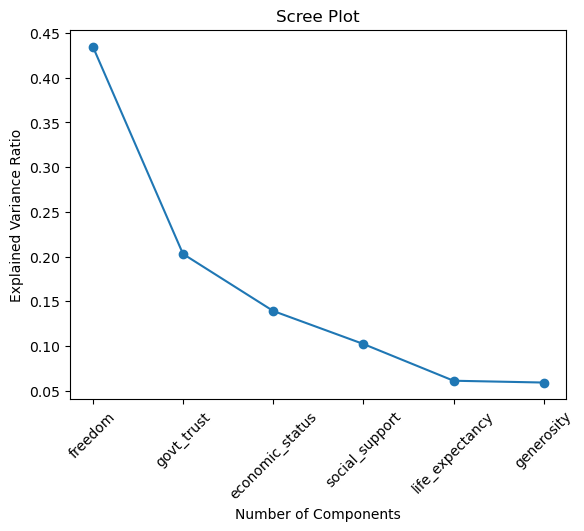

In [13]:
# Creates a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Adds variable names as x-axis labels
plt.xticks(range(1, len(key_variables) + 1), key_variables, rotation=45)

plt.show()

In [14]:
# Prints out each variable name along with its explained variance ratio

for var, evr in zip(key_variables, explained_variance):
    print(f"{var}: {evr:.2f}\n")

freedom: 0.43

govt_trust: 0.20

economic_status: 0.14

social_support: 0.10

life_expectancy: 0.06

generosity: 0.06



***
### 5) Train-Test Split

In [15]:
# Extracts the features (input variables)
features = standardized_df[['freedom', 'govt_trust', 'economic_status', 'social_support', 'life_expectancy', 'generosity']]

#  Extracts the target variable from the original 2015-2023 WHR dataframe
target = df['happiness_score']

In [16]:
# Splits the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [17]:
# Initializes the Linear Regression model

model = LinearRegression()

In [18]:
# Train the model on the training data

model.fit(X_train, y_train)

LinearRegression()

***
### 6) Predictions & Model Evaluation

In [19]:
# Make predictions using the testing data

y_pred = model.predict(X_test)

In [20]:
# Calculates the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculates the R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("\nR-squared (R2) Score:", r2)

Mean Squared Error: 0.2795469542332271

R-squared (R2) Score: 0.779025253407734


***
### 7) Visualizing the Results

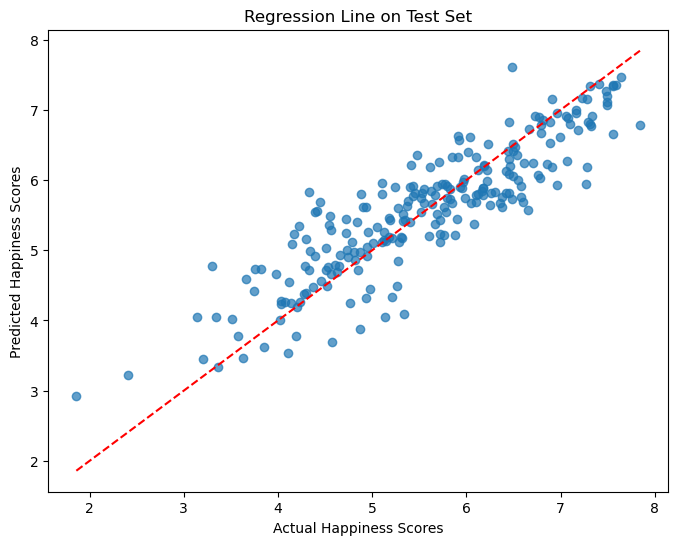

In [22]:
# This scatter plot will show the actual vs. predicted happiness scores 

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Happiness Scores")
plt.ylabel("Predicted Happiness Scores")
plt.title("Regression Line on Test Set")
plt.show()

***
#### *Creating a dataframe to visualize the regression plot in Tableau*

In [23]:
# Create a new DataFrame 'regression_df'
regression_df = pd.DataFrame()

# Adds the 'Actual Happiness Scores' column to the new dataframe and populates it with happiness scores from 'y_test'
regression_df['Actual Happiness Scores'] = y_test

# Addst the 'Predicted Happiness Scores' column to the new dataframe and populates it with the values from 'y_pred'
regression_df['Predicted Happiness Scores'] = y_pred

# Rounds the values in the 'Predicted Happiness Scores' column to 3 decimal points
regression_df['Predicted Happiness Scores'] = regression_df['Predicted Happiness Scores'].round(3)

# Removes the index column
regression_df = regression_df.reset_index(drop=True)

In [24]:
regression_df

,Actual Happiness Scores,Predicted Happiness Scores
0,5.129,5.139
1,5.689,5.908
2,7.076,6.886
3,5.758,5.609
4,4.875,3.873
...,...,...
231,3.632,3.461
232,6.483,5.725
233,4.655,4.938
234,6.016,6.394


In [50]:
# Exports the 'regression_df' dataframe

# regression_df.to_csv(r'C:\Users\ingra\OneDrive\Desktop\regression_df_whr4.csv', index=False)

***
### 8) Summary of Process and Results

**Data Preprocessing and Exploration**

- Standardized the data to make variables comparable and prevent dominance by larger-scaled variables.
- Explored and confirmed the presence of outliers, which were attributed to inherent differences between countries.

**Principal Component Analysis (PCA) Results**

- Utilized PCA to capture key variables' impact on happiness scores.
- Obtained explained variance ratios, which indicate the proportion of variance each variable explains in happiness scores.
- Created a scree plot to visualize the contribution of each variable to overall variance.
- Ranked variables based on their contribution: Freedom (0.43), Govt Trust (0.20), Economic Status (0.14), Social Support (0.10), Life Expectancy (0.06), Generosity (0.06).

**Linear Regression Model**

- Split standardized data into training (80%) and testing (20%) sets.
- Trained a linear regression model to predict happiness scores using key variables.
- Calculated Mean Squared Error (MSE) as a measure of prediction accuracy (0.2795).
- Calculated R-squared (R2) Score to assess model fit (0.7790).

**Interpretation**

- Higher R2 Score indicates strong relationship between key variables and happiness scores.
- Scatterplot with regression line visually compared predicted vs. actual happiness scores.
- Created dataframe to evaluate model predictions against actual data.

**Conclusion**

The analysis revealed that freedom, government trust, economic status, social support, life expectancy, and generosity all play roles in explaining happiness scores. Freedom and government trust had the most substantial impact, followed by economic status, social support, life expectancy, and generosity. While coefficients provide direct relationships between variables and happiness scores, PCA explained variance ratios offer a broader perspective on variable significance. Both approaches collectively emphasize the multi-dimensional nature of factors influencing happiness scores, demonstrating the importance of considering various measures to understand their impact.

***
### 9) Key Variable Descriptions

1. **Freedom:** The degree of personal and political freedom and autonomy individuals have within a country <br><br>

2. **Government Trust:** The level of trust or lack of trust in a country's government institutions, and perceptions of corruption within those institutions <br><br>

3. **Economic Status:** A country's economic performance and prosperity, typically represented by the Gross Domestic Product (GDP) per capita <br><br>

4. **Social Support:** The extent to which social networks, family, and friends provide a support system for individuals in a country <br><br>

5. **Life Expectancy:** The average number of years people to live in good health, often used as an indicator of overall well-being and healthcare quality <br><br>

6. **Generosity:** The willingness of individuals in a country to help others and contribute to social causes